# 简单线性回归

小陈 2022.11.25

## 1 建立数据集

In [1]:
from collections import OrderedDict
import pandas as pd

### 数据集

In [2]:
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
            2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
              48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
examOrderDict = OrderedDict(examDict) 
# print(examDict)
# print(examOrderDict)

In [3]:
examDf = pd.DataFrame(examOrderDict)

查看数据集前5行

In [4]:
examDf.head()

,学习时间,分数
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


## 2 相关系数：两个变量每单位的相关性程度

提取特征与标签

In [5]:
#特征features
exam_X=examDf.loc[:,'学习时间']
#标签labes
exam_Y=examDf.loc[:,'分数']
print(exam_X)
print(exam_Y)

0     0.50
1     0.75
2     1.00
3     1.25
4     1.50
5     1.75
6     1.75
7     2.00
8     2.25
9     2.50
10    2.75
11    3.00
12    3.25
13    3.50
14    4.00
15    4.25
16    4.50
17    4.75
18    5.00
19    5.50
Name: 学习时间, dtype: float64
0     10
1     22
2     13
3     43
4     20
5     22
6     33
7     50
8     62
9     48
10    55
11    75
12    62
13    73
14    81
15    76
16    64
17    82
18    90
19    93
Name: 分数, dtype: int64


绘制散点图

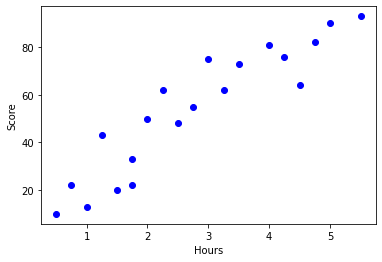

In [7]:
import matplotlib.pyplot as plt

# 散点图
plt.scatter(exam_X, exam_Y, color="b", label="exam data")

plt.xlabel("Hours")
plt.ylabel("Score")

plt.show()

相关系数：corr返回结果是一个数据框，存放的是相关系数矩阵

In [8]:
rDf = examDf.corr()
print("相关系数：")
rDf

相关系数：


,学习时间,分数
学习时间,1.000000,0.923985
分数,0.923985,1.000000


通过以下游戏，熟悉和理解相关系数：
1）此页面允许你使用滑块来更改相关系数，直观了解点的二维分布和相关系数大小，看看数据会如何呈现。
相关性（长按此处可以复制）：http://rpsychologist.com/d3/correlation/

2）猜测相关性的游戏，给出散点图，然后猜测两个变量的相关性系数。别一看这些乱乱的点就没有玩的兴趣了，其实玩起来还是很上瘾的。
关键还得多玩几次找找感觉（长按此处可以复制）：
http://istics.net/Correlations/

3）参考资料《描述统计学》：https://www.zhihu.com/lives/916699160831483904

## 线性回归的实现

### 1.提取特征和标签 

In [9]:
#特征features
exam_X=examDf.loc[:,'学习时间']
#标签labes
exam_Y=examDf.loc[:,'分数']
print(exam_X)
print(exam_Y)

0     0.50
1     0.75
2     1.00
3     1.25
4     1.50
5     1.75
6     1.75
7     2.00
8     2.25
9     2.50
10    2.75
11    3.00
12    3.25
13    3.50
14    4.00
15    4.25
16    4.50
17    4.75
18    5.00
19    5.50
Name: 学习时间, dtype: float64
0     10
1     22
2     13
3     43
4     20
5     22
6     33
7     50
8     62
9     48
10    55
11    75
12    62
13    73
14    81
15    76
16    64
17    82
18    90
19    93
Name: 分数, dtype: int64


### 2.建立训练数据和测试数据
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）  
第1个参数：所要划分的样本特征  
第2个参数：所要划分的样本标签  
train_size：训练数据占比，如果是整数的话就是样本的数量  

In [13]:
from sklearn.model_selection import train_test_split

#建立训练数据集和测试数据集
X_train, X_test, Y_train, Y_test = train_test_split(exam_X, exam_Y, train_size = 0.8)
# X_train, X_test, Y_train, Y_test = train_test_split(exam_X, exam_Y, train_size = .8)
# X_train, X_test, Y_train, Y_test = train_test_split(exam_X, exam_Y, train_size = 4/5)

#输出数据大小
print('原始数据特征：',exam_X.shape ,
      '，训练数据特征：', X_train.shape , 
      '，测试数据特征：',X_test.shape )

print('原始数据标签：',exam_y.shape ,
      '训练数据标签：', Y_train.shape ,
      '测试数据标签：' ,Y_test.shape)

原始数据特征： (20,) ，训练数据特征： (16,) ，测试数据特征： (4,)
原始数据标签： (20,) 训练数据标签： (16,) 测试数据标签： (4,)


#### 绘制散点图

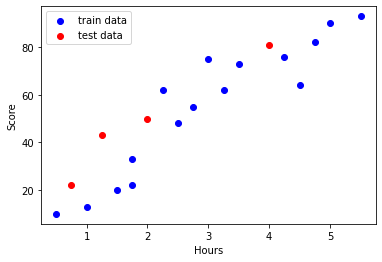

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, color="blue", label="train data")
plt.scatter(X_test, Y_test, color="red", label="test data")

# 添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
# 显示图像
plt.show()

### 3.训练模型

In [19]:
# 第1步：导入线性回归
from sklearn.linear_model import LinearRegression 
# 第2步：创建模型（线性回归）
model = LinearRegression()
# 第3步：训练模型
model.fit(X_train, Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5.5  0.5  1.75 1.75 5.   4.25 4.75 2.75 1.5  3.   1.   2.25 2.5  4.5
 3.25 3.5 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
X_train.shape

(16,)

In [21]:
Y_train.shape

(16,)

sklearn要求输入的特征必须是二维数组的类型，但是因为我们目前只有1个特征，所以需要用安装错误提示用reshape转行成二维数组的类型。

In [27]:
#将训练数据特征转换成二维数组XX行*1列
X_train=X_train.reshape(-1,1)
#将测试数据特征转换成二维数组行数*1列
X_test=X_test.reshape(-1,1)

(16, 1)

In [28]:
X_train.shape

(16, 1)

In [29]:
Y_train.shape

(16,)

In [30]:
X_test.shape

(4, 1)

In [31]:
Y_test.shape

(4,)

In [32]:
#第1步：导入线性回归
from sklearn.linear_model import LinearRegression
# 第2步：创建模型：线性回归
model = LinearRegression()
#第3步：训练模型
model.fit(X_train , Y_train)

LinearRegression()

#### 最佳拟合线：$y=𝑎+𝑏x$  
a:截距intercept  
b:回归系数  

In [33]:
#截距
a=model.intercept_
#回归系数
b=model.coef_

print('最佳拟合线：截距a=',a,'，回归系数b=',b)

最佳拟合线：截距a= 3.9781282375964295 ，回归系数b= [17.05444918]


### 4.结果可视化

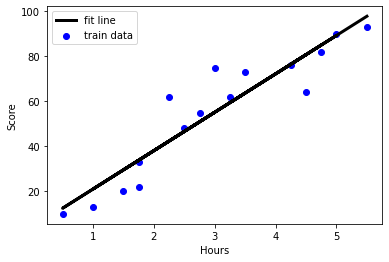

In [36]:
import matplotlib.pyplot as plt
# 绘制散点图
plt.scatter(X_train, Y_train, color="blue", label="train data")

# 训练数据的预测值
Y_train_pred = model.predict(X_train)
# 绘制最佳拟合曲线
plt.plot(X_train, Y_train_pred, color="black", linewidth=3, label="fit line")

# 添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")

plt.show()

### 5.模型评估（使用测试数据）
线性回归的scroe方法得到的是决定系数R平方  
score内部会对第一个参数X_test用拟合曲线自动计算出y预测值，内容是决定系数R平方的计算过程。所以我们只用根据他的要求输入参数即可。

In [38]:
model.score(X_test, Y_test)

0.6870283252838295

#### 可视化

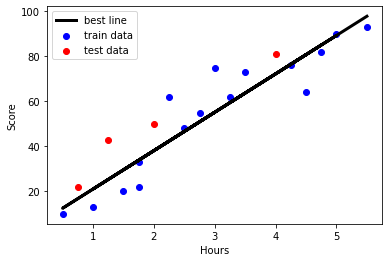

In [39]:


'''
第1步：绘制训练数据散点图
'''
plt.scatter(X_train, Y_train, color='blue', label="train data")

'''
第2步：用训练数据绘制最佳线
'''
#最佳拟合线训练数据的预测值
Y_train_pred = model.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_train_pred
plt.plot(X_train, Y_train_pred, color='black', linewidth=3, label="best line")

'''
第3步：绘制测试数据的散点图
'''
plt.scatter(X_test, Y_test, color='red', label="test data")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Score")
#显示图像
plt.show()